In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df1 = pd.read_csv("data/venda_passagem_01_2020.csv", sep=';', encoding='latin1', on_bad_lines='skip')
df2 = pd.read_csv("data/venda_passagem_11_2019.csv", sep=';', encoding='latin1', on_bad_lines='skip')
df3= pd.read_csv("data/venda_passagem_12_2019.csv", sep=';', encoding='latin1', on_bad_lines='skip')
df4 = pd.read_csv("data/venda_passagem_03_2019.csv", sep=';', encoding='latin1', on_bad_lines='skip')

#df.head()

#print(df.info())
#print(df.head())
#print(df.describe())


In [109]:
#merge the four dataframes into one
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [110]:
# Limpieza combinada
df = df.drop_duplicates()
df = df[df['categoria_transporte'] == 'Interestadual']
df = df[df['tipo_viagem'] == 'Regular']

cols_a_eliminar = [col for col in df.columns if col.startswith('valor')] + [
    'in_passagem_cancelada', 'origem_emissao', 'plataforma_embarque',
    'numero_poltrona', 'data_emissao_bilhete', 'hora_emissao_bilhete',
    'tipo_viagem', 'tipo_gratitude', 'tipo_servico', 'cnpj',
    'numero_equipamento_fiscal', 'codigo_viagem', 'numero_bilhete',
    'categoria_transporte', 'origem_destino_linha'
]

df = df.drop(columns=[col for col in cols_a_eliminar if col in df.columns])


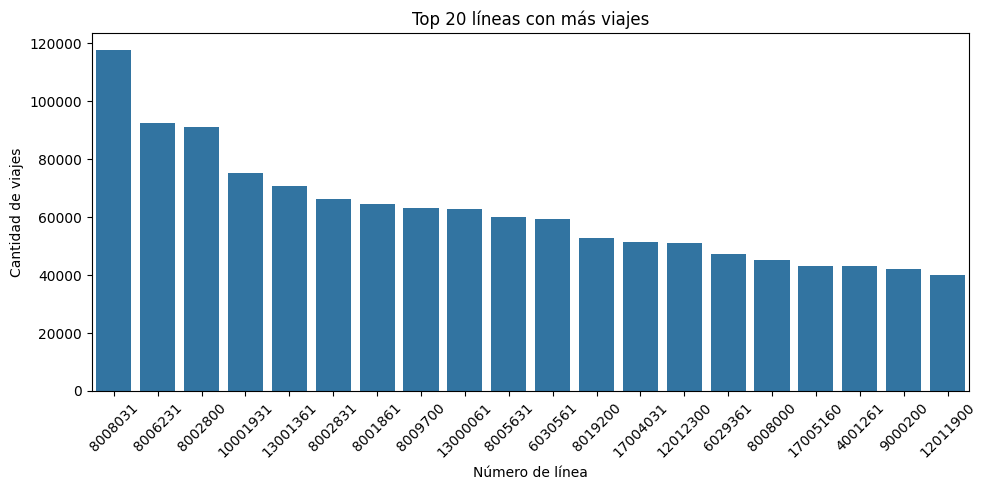

In [111]:
# Convertir fechas y horas a formato usable
df['fecha'] = pd.to_datetime(df['data_viagem'], dayfirst=True, errors='coerce')
df['hora'] = pd.to_datetime(df['hora_viagem'], format='%H:%M:%S', errors='coerce').dt.hour
df['dia'] = df['fecha'].dt.day
df.to_csv("data/viajes_limpios.csv", index=False)
# --- 1. Top líneas más frecuentes ---
plt.figure(figsize=(10, 5))
top_lineas = df['nu_linha'].value_counts().nlargest(20)
sns.barplot(x=top_lineas.index.astype(str), y=top_lineas.values)
plt.title("Top 20 líneas con más viajes")
plt.xlabel("Número de línea")
plt.ylabel("Cantidad de viajes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

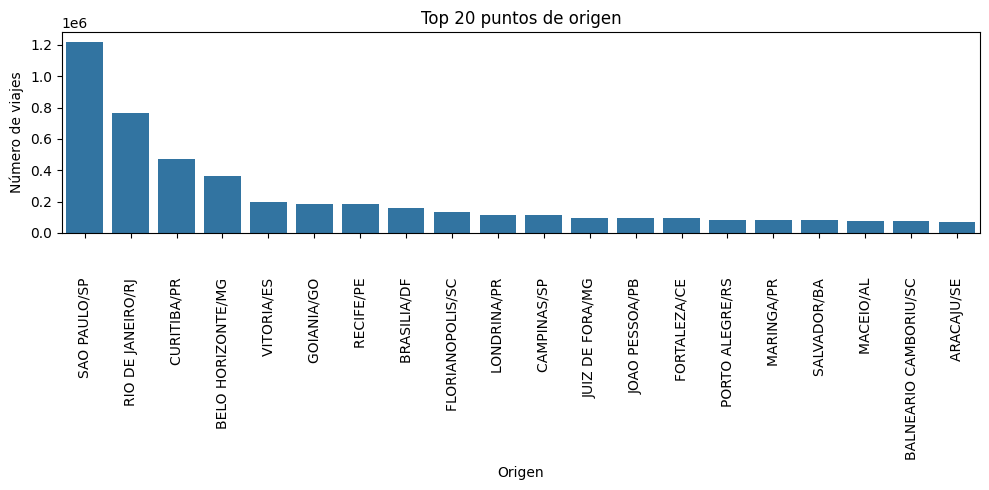

In [112]:
# --- 2. Puntos de origen más frecuentes ---
plt.figure(figsize=(10, 5))
top_origen = df['ponto_origem_viagem'].value_counts().nlargest(20)
sns.barplot(x=top_origen.index, y=top_origen.values)
plt.title("Top 20 puntos de origen")
plt.xlabel("Origen")
plt.ylabel("Número de viajes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

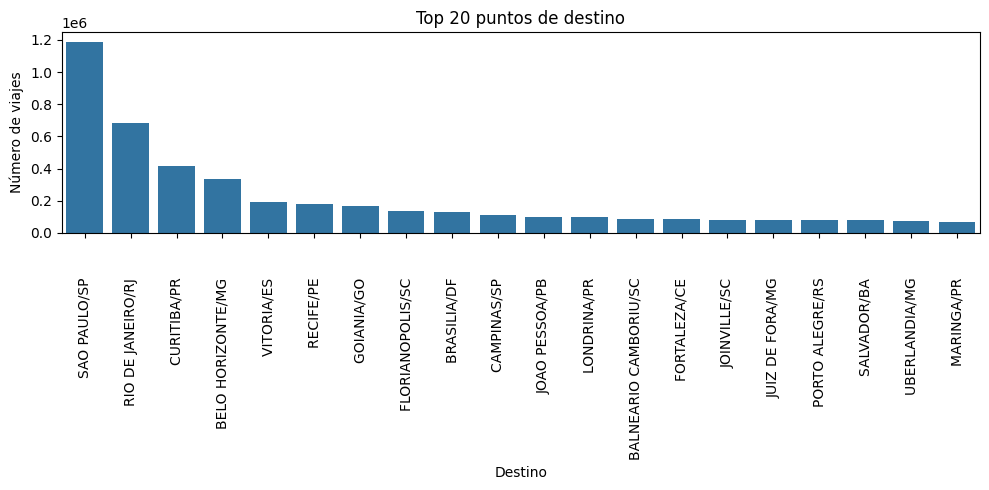

In [113]:
# --- 3. Puntos de destino más frecuentes ---
plt.figure(figsize=(10, 5))
top_destino = df['ponto_destino_viagem'].value_counts().nlargest(20)
sns.barplot(x=top_destino.index, y=top_destino.values)
plt.title("Top 20 puntos de destino")
plt.xlabel("Destino")
plt.ylabel("Número de viajes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


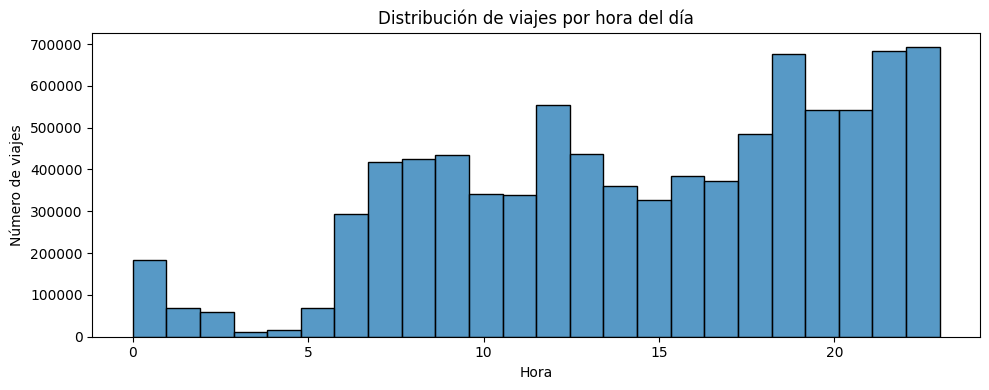

In [114]:
# --- 4. Histograma de frecuencia por hora del día ---
plt.figure(figsize=(10, 4))
sns.histplot(df['hora'].dropna(), bins=24)
plt.title("Distribución de viajes por hora del día")
plt.xlabel("Hora")
plt.ylabel("Número de viajes")
plt.tight_layout()
plt.show()

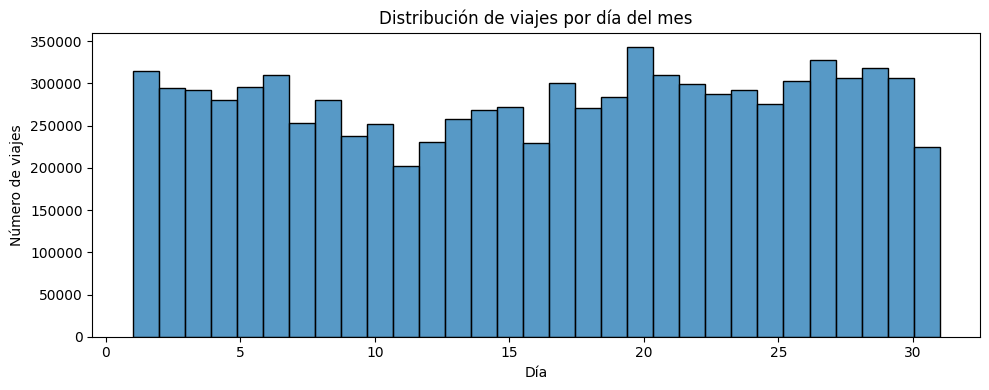

In [115]:
# --- 5. Histograma de viajes por día del mes ---
plt.figure(figsize=(10, 4))
sns.histplot(df['dia'].dropna(), bins=df['dia'].nunique())
plt.title("Distribución de viajes por día del mes")
plt.xlabel("Día")
plt.ylabel("Número de viajes")
plt.tight_layout()
plt.show()

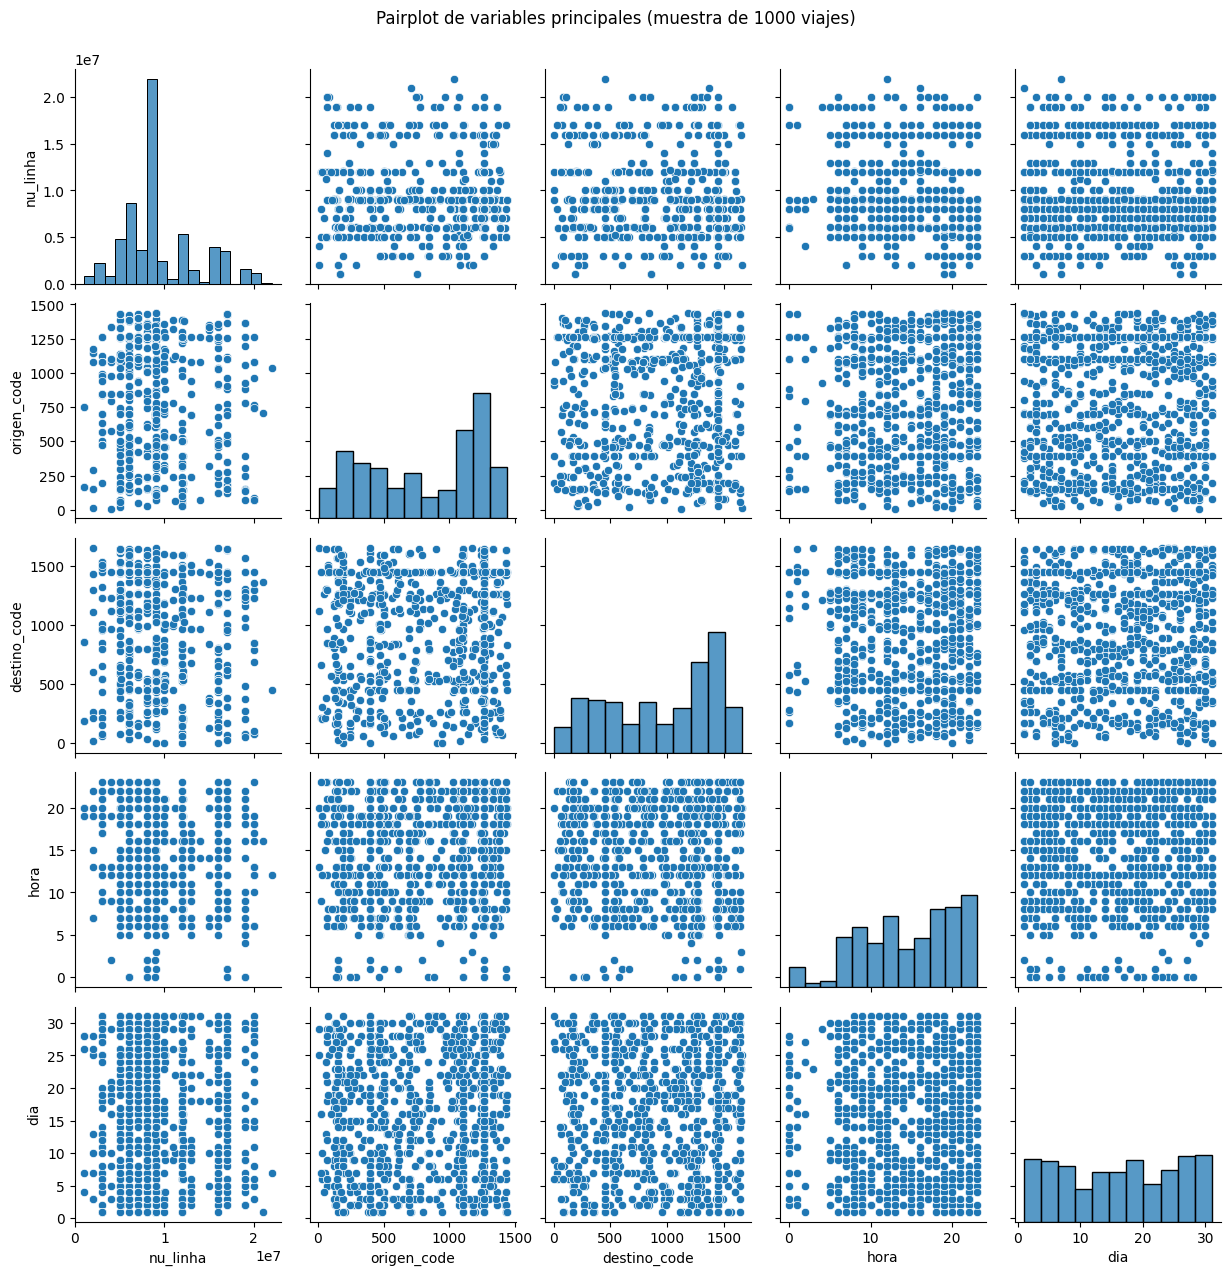

In [116]:
# Codificamos puntos de origen y destino con códigos numéricos
df['origen_code'] = df['ponto_origem_viagem'].astype('category').cat.codes
df['destino_code'] = df['ponto_destino_viagem'].astype('category').cat.codes

# Seleccionamos las columnas a visualizar
subset = df[['nu_linha', 'origen_code', 'destino_code', 'hora', 'dia']].dropna()

# Visualizamos
sns.pairplot(subset.sample(n=1000, random_state=42))  # limitamos a 1000 para que no sea pesado
plt.suptitle("Pairplot de variables principales (muestra de 1000 viajes)", y=1.02)
plt.show()